In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rtlsdr import RtlSdr
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
import scipy.signal

In [2]:
sdr = RtlSdr()
sdr.sample_rate = 2.048e6  # Hz
#sdr.center_freq = 792e6  # Hz
sdr.freq_correction = 60  # PPM
sdr.gain = 'auto'


In [3]:
model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1024,)),  # Define input shape
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=256, activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax')
    ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
def feature_extraction(samples):
    fft=np.fft.fft(samples)
    #(f, S) = scipy.signal.periodogram(samples, 2.048e6, scaling='density')
    #new_data=fft.extend(S)
    return fft

 cycle: 0  loss: 0.0018054627580568194
 cycle: 1  loss: 0.024576397612690926
 cycle: 2  loss: 0.03860484063625336
 cycle: 3  loss: 0.06731025874614716
 cycle: 4  loss: 1.0170636177062988
 cycle: 5  loss: 0.012300936505198479
 cycle: 6  loss: 0.026597773656249046
 cycle: 7  loss: 0.02511630393564701
 cycle: 8  loss: 0.07801464200019836
 cycle: 9  loss: 0.014995940029621124
 cycle: 10  loss: 0.04261146858334541
 cycle: 11  loss: 0.091783307492733
 cycle: 12  loss: 0.04152071848511696
 cycle: 13  loss: 1.3151201009750366
 cycle: 14  loss: 0.07913858443498611
 cycle: 15  loss: 0.05067162588238716
 cycle: 16  loss: 0.020566308870911598
 cycle: 17  loss: 0.02072850614786148
 cycle: 18  loss: 0.008328941650688648
 cycle: 19  loss: 0.00508017186075449
 cycle: 20  loss: 0.01539525669068098
 cycle: 21  loss: 0.007865054532885551
 cycle: 22  loss: 0.30189839005470276
 cycle: 23  loss: 1.2135895490646362
 cycle: 24  loss: 0.016009945422410965
 cycle: 25  loss: 0.009456484578549862
 cycle: 26  loss

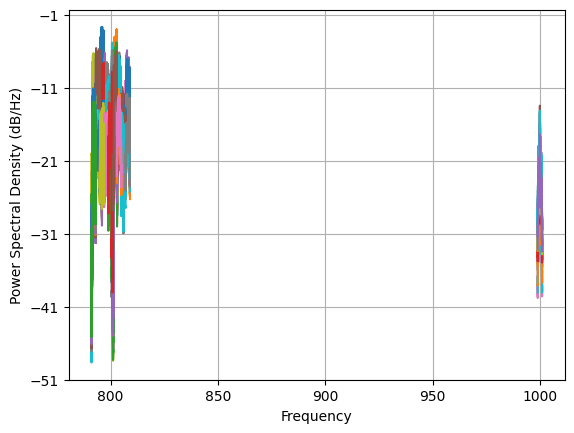

In [8]:
sdr = RtlSdr()
sdr.sample_rate = 2.048e6  # Hz
#sdr.center_freq = 792e6  # Hz
sdr.freq_correction = 60  # PPM
sdr.gain = 'auto'
i=0
loss_list=[0]
try:
        while True:       
              # Read a batch of samples
            # Process and extract features from the samples
            #freqs={'0':792e6,'1':794e6,'2':796e6,'3':798e6,'4':800e6,'5':802e6,'6':804e6,'7':806e6,'8':808e6}
            freqs={'0':1000e6,'1':792e6,'2':794e6,'3':796e6,'4':798e6,'5':800e6,'6':802e6,'7':804e6,'8':806e6,'9':808e6}
            a=random.choice(list(freqs.keys()))
            sdr.center_freq =  freqs[a] # Hz

            samples = sdr.read_samples(256*1024)
            # Determine the label based on the frequency range
            label=np.array(int(a))

            # Convert label to one-hot encoding
            #features=feature_extraction(samples)
            features, freqs = plt.psd(samples, NFFT=1024, Fs=sdr.sample_rate / 1e6, Fc=sdr.center_freq / 1e6)

            features = np.expand_dims(features, axis=0) 
            
            features=features.real
            # Fit the scaler on your data
            features[0]=features[0]/max(abs(features[0]))
            # Reshape features and labels for model training
            #features = np.expand_dims(features, axis=0)  # Add batch dimension
            
            #print(features)
            label_one_hot = tf.keras.utils.to_categorical(label, num_classes=10)
            label_one_hot = np.expand_dims(label_one_hot, axis=0)
            #features=features.reshape(4096,1)
            # Train the model incrementally with the new data
            a=model.train_on_batch(features, label_one_hot)
            loss_list.append(a[0])
            print(" cycle: {}  loss: {}".format(i,a[0]))
            i=i+1
            
except KeyboardInterrupt:
        pass
sdr.close()

1/1 [==============================] - 0s 17ms/step
, accuracy: 0.0
1/1 [==============================] - 0s 20ms/step
True Prediciton
, accuracy: 0.5
1/1 [==============================] - 0s 24ms/step
, accuracy: 0.3333333333333333
1/1 [==============================] - 0s 24ms/step
True Prediciton
, accuracy: 0.5
1/1 [==============================] - 0s 22ms/step
True Prediciton
, accuracy: 0.6
1/1 [==============================] - 0s 16ms/step
, accuracy: 0.5
1/1 [==============================] - 0s 18ms/step
True Prediciton
, accuracy: 0.5714285714285714
1/1 [==============================] - 0s 18ms/step
True Prediciton
, accuracy: 0.625
1/1 [==============================] - 0s 17ms/step
True Prediciton
, accuracy: 0.6666666666666666
1/1 [==============================] - 0s 19ms/step
True Prediciton
, accuracy: 0.7
1/1 [==============================] - 0s 19ms/step
True Prediciton
, accuracy: 0.7272727272727273
1/1 [==============================] - 0s 25ms/step
True Predi

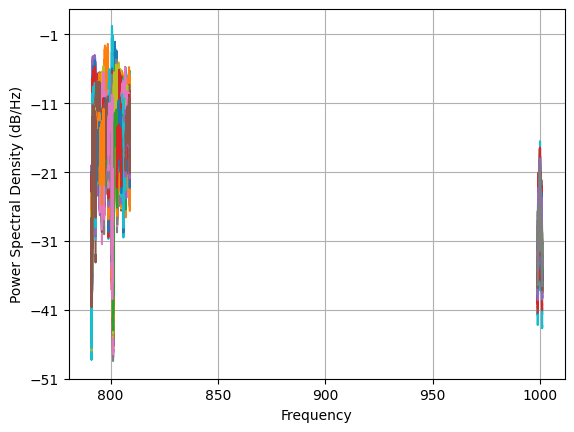

In [10]:
sdr = RtlSdr()
sdr.sample_rate = 2.048e6  # Hz
#sdr.center_freq = 792e6  # Hz
sdr.freq_correction = 60  # PPM
sdr.gain = 'auto'
j=0
true_=0
i=0
acc_list=[0]

try:
    while True:
        
            #freqs={'0':792e6,'1':794e6,'2':796e6,'3':798e6,'4':800e6,'5':802e6,'6':804e6,'7':806e6,'8':808e6}

            freqs={'0':1000e6,'1':792e6,'2':794e6,'3':796e6,'4':798e6,'5':800e6,'6':802e6,'7':804e6,'8':806e6,'9':808e6}
            a=random.choice(list(freqs.keys()))
            sdr.center_freq =  freqs[a] # Hz

            samples = sdr.read_samples(256*1024)
            # Determine the label based on the frequency range
            label=np.array(int(a))

            # Convert label to one-hot encoding
            #features=feature_extraction(samples)
            features, freqs = plt.psd(samples, NFFT=1024, Fs=sdr.sample_rate / 1e6, Fc=sdr.center_freq / 1e6)

            features = np.expand_dims(features, axis=0) 

            features=features.real

            features[0]=features[0]/max(abs(features[0]))
            
            label_one_hot = tf.keras.utils.to_categorical(label, num_classes=10)
            label_one_hot = np.expand_dims(label_one_hot, axis=0)
            
            q=model.predict(features)
            predicted_classes = np.argmax(q, axis=1)
            real_class=np.argmax(label_one_hot,axis=1)
            if predicted_classes==real_class:
                  print("True Prediciton")
                  i=i+1
                  true_=true_+1
            else:
                  i=i+1
            #result=model.predict_on_batch(features)
            #print(result)
            accuracy=true_/i
            acc_list.append(accuracy)
            print(", accuracy: {}".format(accuracy))

except KeyboardInterrupt:
      pass
sdr.close()

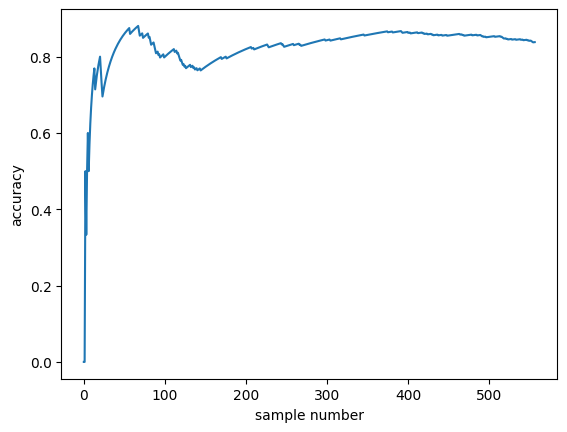

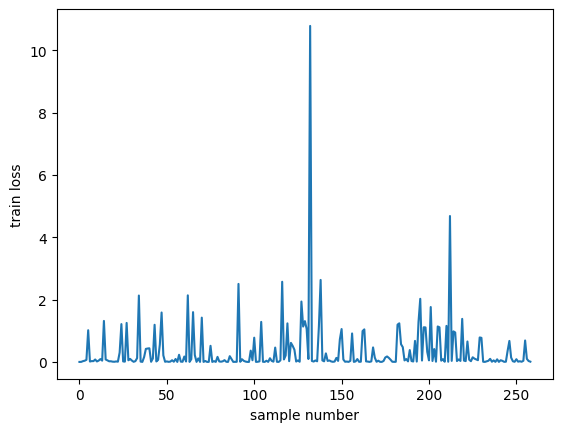

In [11]:
plt.plot(acc_list)
plt.xlabel('sample number')
plt.ylabel('accuracy')
plt.show()
plt.plot(loss_list)
plt.xlabel('sample number')
plt.ylabel('train loss')
plt.show()

In [133]:
freqs={'0':1000e6,'1':792e6,'2':794e6,'3':796e6,'4':798e6,'5':800e6,'6':802e6,'7':804e6,'8':806e6,'9':808e6}
a=random.choice(list(freqs.keys()))
label=np.array(int(a))
label_one_hot = tf.keras.utils.to_categorical(label, num_classes=10)